# **APIs**

API stands for Application Program Interface and is a way for two or more computer programmes to communicate with each other.

REST (Representational State Transfer) APIs allow communication between a client (your program) and a server (usually online) using HTTP (HyperText Transfer Protocol) to communicate.

A HTTP request is sent from client to server containing the instructions in a file (usually .json). The server then executes the instructions and sends a HTTP response which contains the result.

Let's look at an example.

In [1]:
import requests
import json
import pandas

We first define the HTTP request providing the appropriate URL.

In [2]:
country = 'Italy'
daterange = '20211215-20220115'
url = ( 'https://covidmap.umd.edu/api/resources?indicator=covid&type=smoothed&country=' +
    country + '&daterange=' + daterange )

We then send request via API and collect the text response using the `get()` function.

In [3]:
response = requests.get(url)
print(response)

<Response [200]>


We can get a number of API responses the key ones to remember are:

*   200 - success
*   400 - bad request (i.e., the error is in our code)
*   500 - internal server error (i.e., the error is on the server side)


We then transform the text response in a json file. a json is a JavaScript Object Notation consisting of name-object pairs and punctuation in the form of brackets, parentheses, semicolons and colons (basically a big dictionary!)

In [4]:
jsonData = json.loads(response.text)
print(jsonData)

{'data': [{'smoothed_pct_covid': 0.008273, 'smoothed_covid_se': 0.000746, 'sample_size': 23576.0, 'country': 'Italy', 'iso_code': 'ITA', 'gid_0': 'ITA', 'survey_date': '20211215'}, {'smoothed_pct_covid': 0.00833, 'smoothed_covid_se': 0.000705, 'sample_size': 25805.0, 'country': 'Italy', 'iso_code': 'ITA', 'gid_0': 'ITA', 'survey_date': '20211216'}, {'smoothed_pct_covid': 0.008428, 'smoothed_covid_se': 0.00073, 'sample_size': 25625.0, 'country': 'Italy', 'iso_code': 'ITA', 'gid_0': 'ITA', 'survey_date': '20211217'}, {'smoothed_pct_covid': 0.009292, 'smoothed_covid_se': 0.000849, 'sample_size': 25439.0, 'country': 'Italy', 'iso_code': 'ITA', 'gid_0': 'ITA', 'survey_date': '20211218'}, {'smoothed_pct_covid': 0.009478, 'smoothed_covid_se': 0.000884, 'sample_size': 24049.0, 'country': 'Italy', 'iso_code': 'ITA', 'gid_0': 'ITA', 'survey_date': '20211219'}, {'smoothed_pct_covid': 0.009137, 'smoothed_covid_se': 0.000853, 'sample_size': 24124.0, 'country': 'Italy', 'iso_code': 'ITA', 'gid_0': '

And lastly convert the json to a pandas dataframe - ready for us to use.

In [5]:
df = pandas.DataFrame.from_dict(jsonData['data'])
df.head()

,smoothed_pct_covid,smoothed_covid_se,sample_size,country,iso_code,gid_0,survey_date
0,0.008273,0.000746,23576.0,Italy,ITA,ITA,20211215
1,0.008330,0.000705,25805.0,Italy,ITA,ITA,20211216
2,0.008428,0.000730,25625.0,Italy,ITA,ITA,20211217
3,0.009292,0.000849,25439.0,Italy,ITA,ITA,20211218
4,0.009478,0.000884,24049.0,Italy,ITA,ITA,20211219


## **Using World Bank Data API**

You can find the documentation on the API and practical examples [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures) and [here](https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata).

Let's replicate the example code below.

We first need to install the `wbdata` library which contains the API call.

In [13]:
!pip install wbdata

We then import the libraries.

In [16]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

The `get_country()` function gives us a list of all countries.  

In [ ]:
wbdata.get_country()

We can pick the countries that interest us.

In [33]:
countries = ["USA","GBR","ITA"]

The `get_indicator()` function gives us a list of all indicators.

In [ ]:
wbdata.get_indicator()

We can choose the indicator that we want.

In [24]:
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}

We then make the call using the country and indicators parameters.

In [34]:
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

The df is given as a pivot table, pandas' `.unstack()` method helps reshape it into something plottable.

In [35]:
dfu = df.unstack(level=0)

We can now plot the GNI for the selected countries.

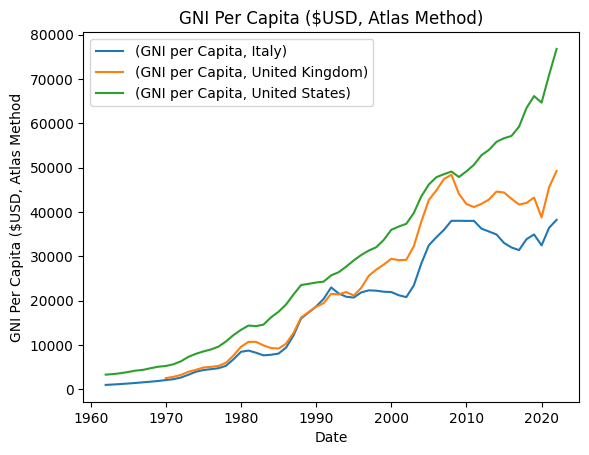

In [36]:
dfu.plot();
plt.legend(loc='best');
plt.title("GNI Per Capita ($USD, Atlas Method)");
plt.xlabel('Date');
plt.ylabel('GNI Per Capita ($USD, Atlas Method');